# Lab 1: Sampling and coding basics

This lab aims to get familiar with the basics of audio sampling and of coding audio signals, listening to its effect.

Make sure you understand all the code given and its signal processing task before answering the questions. Use headphones to listen to the sounds when doing the different exercises.

To do the labs best is to use Visual Studio Code, cloning this repository, `git clone https://github.com/xserra/audio-coding-materials.git`, and installing the material as described in the README file of the repository. You should submit the python notebook through the Aula Global. The notebooks should be selfcontained.

## Relevant concepts:

### Spectrum
The magnitude spectrum of a sound fragment describes the magnitudes of its sinusoidal components as a function of frequency.

### Spectrogram
The magnitude spectrogram of a sound is a visual way to represent a sequence of magnitude spectra computed over a whole sound, thus showing the time-varying nature of a sound.

### Sampling Rate
Number of samples of a signal taken every second. It defines the frequency range obtained.

### Bit depth
Number of bits used to represent every sample of a signal. It defines the dynamic range obtained.

### Resampling
Changing the sampling rate of a signal. It is first important to filter out the frequencies that cannot be represented in the new sampling rate.

### Quantization
Changing the number of bits used to represent every sample of a signal.

### MP3
Formally MPEG-1 Audio Layer III is a coding format for digital audio commonly used on internet applications.

In [24]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy.fft import fft
import IPython.display as ipd
from scipy.io.wavfile import read
from pydub import AudioSegment

In [25]:
# functions used in the whole lab
def read_sound(file):
  """ read a mono wav sound file, assuming is mono, and convert it to a floating point array
    Args:
      file (str): File name
    Returns:
      sound_array (numpy.array): Array of samples as floating point values between -1 and 1
      sampling_rate (int): Sampling rate
  """
  # read sound file
  sampling_rate, x = read(file)
  # convert to floating point values between -1 and 1, assuming x are 16 bit integers
  sound_array = np.float32(x) / 2**15
  return sound_array, sampling_rate

def display_sound(sound_array, sampling_rate=44100):
  """ Display signal sound_array
    Args:
      sound_array (numpy.array): Array of samples
      sampling_rate (int): Sampling rate
  """
  # plot the waveform of the sound
  plt.figure(0, figsize=(10, 3))
  time_indexes = np.arange(0, sound_array.size/sampling_rate, 1.0/sampling_rate)
  plt.plot(time_indexes, sound_array)
  plt.xlabel('time (seconds)')
  plt.ylabel('amplitude')
  plt.show()
  # play the sound
  ipd.display(ipd.Audio(data=sound_array, rate=sampling_rate))

def display_spectrum(sound_array, sampling_rate=44100):
  """ Display magnitude spectrum of signal sound_array
    Args:
      sound_array (numpy.array): Array of samples
      sampling_rate (int): Sampling rate
  """
  # compute the hanning window
  window = signal.get_window('hann', sound_array.size)
  # compute the spectrum of the windowed input signal
  spectrum = fft(window*sound_array)
  # compute the magnitude spectrum in dB
  magnitude_spectrum = 20*np.log10(abs(spectrum[:spectrum.size//2]))

  # plot the magnitude spectrum
  plt.figure(0, figsize=(10, 5))
  frequency_indexes = np.arange(0, sampling_rate/2, sampling_rate/spectrum.size)
  plt.plot(frequency_indexes, magnitude_spectrum)
  plt.xlabel('frequency (Hz)')
  plt.ylabel('amplitude (dB)')
  plt.show()

def display_spectrogram(sound_array, hop_size=256, fft_size=512, sampling_rate=44100):
  """ Display magnitude spectrogram of signal sound_array
    Args:
      sound_array (numpy.array): Array of samples
      hop_size (int): window hop size
      fft_size (int): Spectrogram fft size
      sampling_rate (int): Sampling rate of sound
  """
  # compute the hanning window
  window = signal.get_window('hann', fft_size)
  # initialize the output spectrogram
  magnitude_spectrogram = []
  sample_index = 0
  # iterate over the input sound computing a sequence of spectra
  while sample_index < sound_array.size-fft_size:
    spectrum = fft(window*sound_array[sample_index:sample_index+fft_size])
    magnitude_spectrum = 20*np.log10(abs(spectrum[:spectrum.size//2]))
    magnitude_spectrogram.append(magnitude_spectrum)
    sample_index += hop_size

  # plot the magnitude spectrogram
  plt.figure(figsize=(10, 5))
  time_indexes = np.arange(0, sample_index/sampling_rate, hop_size/sampling_rate)
  frequency_indexes = np.arange(0, sampling_rate/2, sampling_rate/fft_size)
  plt.pcolormesh(time_indexes, frequency_indexes, np.transpose(magnitude_spectrogram), shading='nearest', cmap='inferno')
  plt.colorbar(format='%+2.0f dB')
  plt.xlabel('time (seconds)')
  plt.ylabel('frequency (Hz)')
  #plt.ylim(0, 1000)
  plt.show()

## Part 1- Reading and plotting an audio file

Read and plot an audio file from the 'sounds' directory, 'synthetic.wav'. Listen to the sound and plot its waveform, plot a magnitude spectrum of a sound fragment, and the magnitude spectrogram of the whole sound. For both the spectrum and the spectrogram try different values of the `fft_size`: 256, 1024, and 2048. Answer the questions given and modify the code to support your answers.

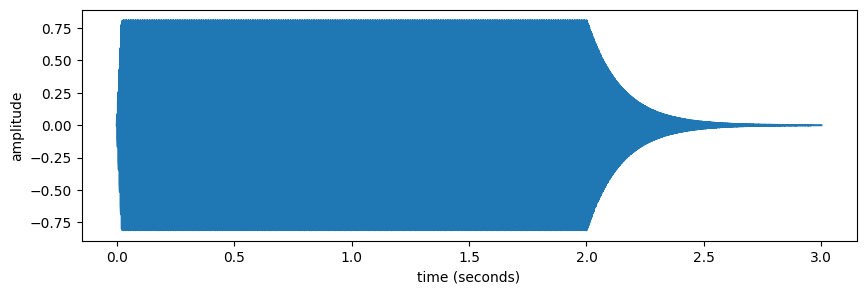

In [26]:
# read and display a sound
sound_array, sampling_rate = read_sound('../sounds/synthetic.wav')
display_sound(sound_array, sampling_rate)

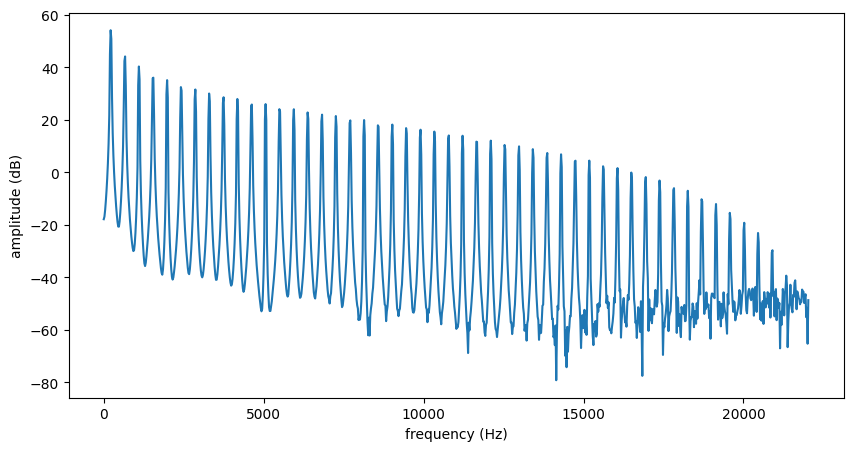

In [27]:
# display spectrum of a stable fragment of sound_array, try different values for fft_size, all being a power of 2
# ex: 256, 1024, 2048
fft_size = 2048
sample_offset = int(1.0 * sampling_rate) # choose the starting sample at 1 second
display_spectrum(sound_array[sample_offset:sample_offset+fft_size], sampling_rate)

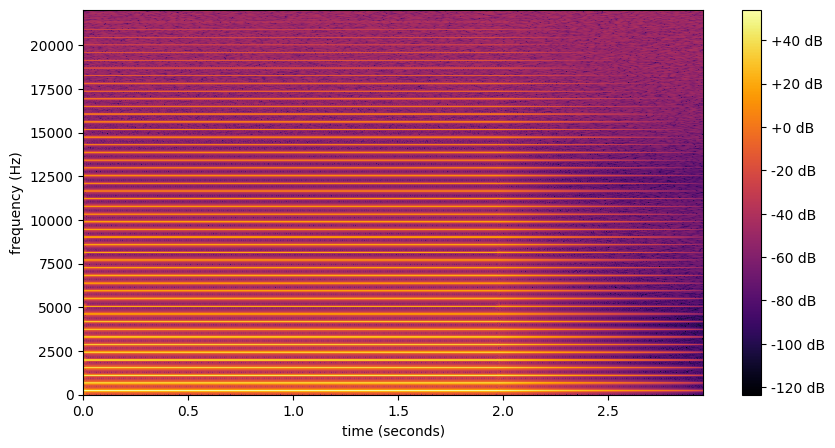

In [28]:
# display spectrogram of x, try different values for fft_size, all being a power of 2
# ex: 256, 1024, 2048
hop_size = 128
fft_size = 2048
display_spectrogram(sound_array, hop_size, fft_size, sampling_rate)


**Questions: (answer them in this text cell)**

**1. Explain the effect of the different fft_size values in the spectrum and spectrogram displays of the `synthetic.wav` sound. Example values to try: 256, 1024, 2048. Modify the code above as necessary and refer to it and to the resulting plots to support the explanation.**

We know that the fft size corresponds to the number of points used in the FFT, which is used to convert a signal from the time domain to the frequency domain. Hence, the lower the fft size, the less numbers of samples we take and therefore, the lower the frequency resolution. 

Spectrum analysis: we can see that with fft_size = 256, altough we see that the functions covers a wide range of frequencies, the amplitude range is very short, while with fft_size = 1024 there's much more amplitude information. With fft_size of 2048, there seems to be some overlap in the highest frequencies, as there are more lines and they are thicker in that range. 

Spectogram analysis: we can see that the lower the fft size, the better the time resolution, that is, we can track better rapid changes in sound with fft size of 256 or even 128, while the frequency resolution increases when the fft size increases as well. With a fft size of 2048 we can clearly see the frequencies that the sound has, which are the brighter lines.

**2. What is the fundamental frequency, in Hz, of the `synthetic.wav` sound?. Explain how you identifyied it. Modify or add any code and plots above to support your answer.**

The fundamental frequency of the sound can be identified when plotting the spectogram with high frequency resolution, as it corresponds to the frequency of the lower bright line. Using the plt.ylim function, we can zoom in the plot and identify that the lower bright line, which corresponds to the fundamental frequency, is at around 210Hz.

----

## Part 2 - Resample sound

Resample (decimate) and change the bits per sample (quantize) a sound signal by different amounts and compare the results. Find the highest compression that still keeps the perceptual qualities of the original sound. Answer the questions given and modify the code as needed.

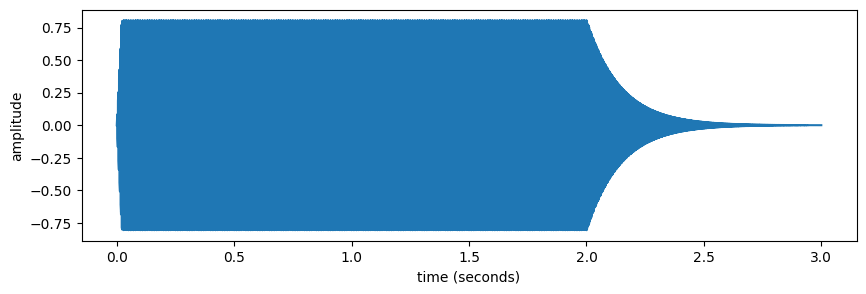

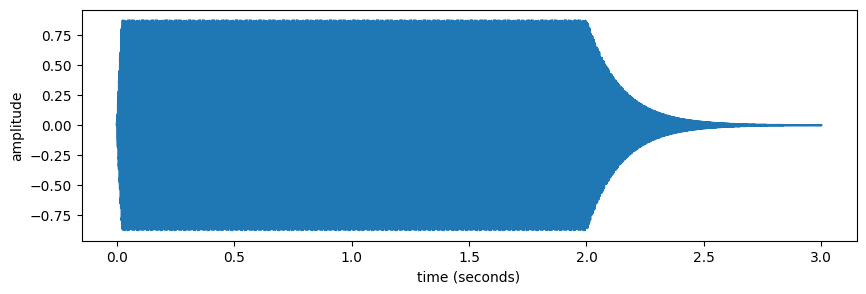

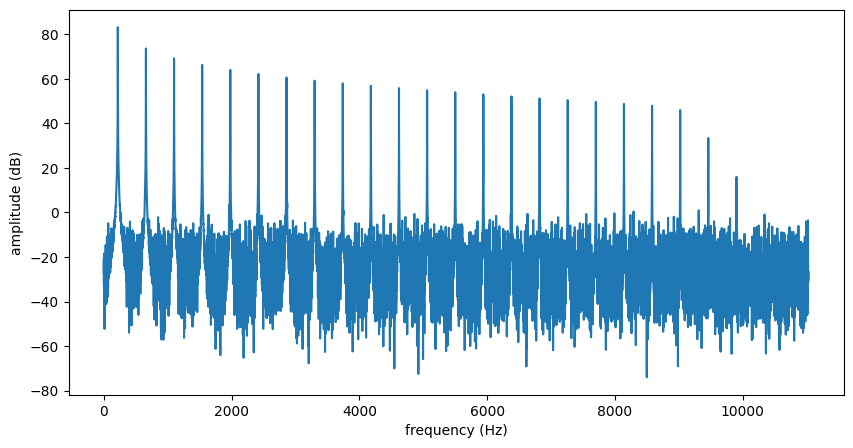

In [62]:
def quantize_signal(x, original_bits, target_bits):
  """Quantizes a signal x, assuming it originally had original_bits bits per sample, to target_bits per sample.
  Args:
    x (numpy.array): Array of samples as floating point values between -1 and 1
    original_bits (int): Number of bits of the signal that x represents
    target_bits (int): Number of bits per sample of the output signal
  """
  # Scaling the signal to the range of [0, 2^target_bits - 1]
  x_scaled = (x - np.min(x)) / (np.max(x) - np.min(x)) * (2**target_bits - 1)
  # Quantize by rounding
  x_quantized = np.round(x_scaled)
  # Re-scaling back to the original amplitude range
  x_output = (x_quantized / (2**target_bits - 1)) * (np.max(x) - np.min(x)) + np.min(x)
  return x_output

# change the decimate_factor (dowmnsample the sound) and find the lowest sampling rate for which you do not hear a difference
decimate_factor = 3   # 2 means reducing the sampling rate to half of the original
decimated_sound_array = signal.decimate(sound_array, decimate_factor)
#display_sound(decimated_sound_array, sampling_rate/decimate_factor)
#display_spectrum(decimated_sound_array, sampling_rate/decimate_factor)

# change the number_of_bits of the samples and find the lowest number for which you do not hear a difference
number_of_bits = 2   # 8 means to reduce the number of bits per sample to half of the original, which is 16
quantized_sound_array = quantize_signal(sound_array, 16, number_of_bits)
#display_sound(quantized_sound_array, sampling_rate)
#display_spectrum(quantized_sound_array, sampling_rate)

# change the decimate_factor (dowmnsample the sound) and the number_of_bits (quantize)
# to find the most compressed signal for which you do not hear a difference
number_of_bits = 16
decimate_factor = 1
decimated_and_quantized_sound_array= quantize_signal(signal.decimate(sound_array, decimate_factor), 16, number_of_bits)
display_sound(decimated_and_quantized_sound_array, sampling_rate/decimate_factor)

number_of_bits = 10
decimate_factor = 2
decimated_and_quantized_sound_array= quantize_signal(signal.decimate(sound_array, decimate_factor), 16, number_of_bits)
display_sound(decimated_and_quantized_sound_array, sampling_rate/decimate_factor)
display_spectrum(decimated_and_quantized_sound_array, sampling_rate/decimate_factor)


**Questions: (answer in this text cell)**

**1. Modify the decimation factor applied to the `synthetic.wav`. What is the biggest decimation for which you do not hear a difference? Change the demination factor in the code and explain the result supporting your answer with any needed plot. Use both the waveform and the spectrum.**
The highest decimation factor for which the perceptual quality of the sound remains unchanged is 2. From a decimation factor of 3 onwards, there is a noticeable degradation in the sound quality. The audio becomes less bright and clear, with a significant loss of high-frequency content.

Waveform Analysis: When we apply a decimation factor greater than 2, the waveform begins to lose its smoothness and continuity. This results in visible distortions, we can see how the amplitude starts varying in the decimated waveform while in the original one it's constant.

Spectrum Analysis: The spectrum plot reveals a substantial loss of frequency components with decimation factors greater than 2. High-frequency information, which contributes to the clarity and brightness of the sound, is particularly affected. The spectrum shows a clear drop-off in higher frequencies, indicating that decimation beyond this point leads to the elimination of crucial harmonics and details, resulting in a duller sound.


**2. Modify the quantization applied to the `synthetic.wav`. What is the biggest quantization for which you do not hear a difference?. Change the number of bits in the code and explain your answer supporting it with any needed plot.**
When decreasing the number of bits used for quantization, we notice that there is a significant margin for compression before the sound quality degrades. The original synthetic.wav has a 16-bit representation, and we don't perceive any noticeable changes in sound quality until we reduce the number of bits to 4. At this point, especially in the last seconds of the audio, we begin to hear audible distortions.

Waveform Analysis: With 4 bits, the waveform becomes visibly different from the original, particularly in the latter part. The amplitude appears to be more "stepped" and less smooth, reflecting the reduced dynamic range. This quantization effect is also seen in the increased thickness of the waveform plot, indicating a loss of fine detail and an increase in quantization noise.

Spectrum Analysis: When using 8 bits or more, there are slight changes in the overall amplitude of the frequencies, but the main spectral peaks and their relative positions remain intact. This suggests that the overall shape of the sound is preserved, even though some quantization noise is introduced. However, when the bit depth is reduced below 4 bits, we observe significant spectral distortion. Additional frequency components appear, indicating the presence of quantization noise and harmonic distortion. This results in a noticeable degradation in sound quality, as the original frequency peaks are no longer clearly distinguishable.


**3. Compress the sound `synthetic.wav` by applying both decimation and quantization. What it the highest compression factor you get without losing the perceptual quality of the original sound when performing both a decimation and a quantization?. Explain your answer supporting it with any needed plot.**
When applying both decimation and quantization to compress the synthetic.wav file, the decimation factor proves to be the more restrictive parameter. With a decimation factor of 2, the sampling rate is reduced by half, and this already brings the signal closer to the threshold where quality loss becomes perceptible. Therefore, we have limited room to reduce the number of bits without degrading the sound quality.

Optimal Compression Settings: With a decimation factor of 2, the minimum bit depth that can be used without perceivable distortion is 10 bits. If we reduce the bit depth below 10, the sound starts to exhibit noticeable artifacts such as distortion and a reduction in dynamic range. The quantization noise becomes apparent, especially in the quieter parts of the audio.

Waveform Analysis: The waveform plot with a decimation factor of 2 and 10-bit quantization remains relatively smooth and retains the overall shape of the original waveform. This indicates that the fundamental structure of the sound is preserved. However, reducing the bit depth further introduces visible "stepping" and discontinuities, suggesting increased quantization error.

Spectrum Analysis: The spectrum plot shows that with 10-bit quantization, the primary frequency components of the sound remain intact, although there is a slight increase in the noise floor due to quantization. Below 10 bits, additional frequency components appear, indicating harmonic distortion and increased quantization noise, which alters the perceived quality of the sound.

---

## Part 3 - Apply audio coding
Compress an audio signal with mp3, using different bit rates to control the compression. Find the lowest bit rate for which you do not hear a difference. Change the code as needed and answer the questions given.

wav file size: 264644 bytes
mp3 file size: 30607 bytes


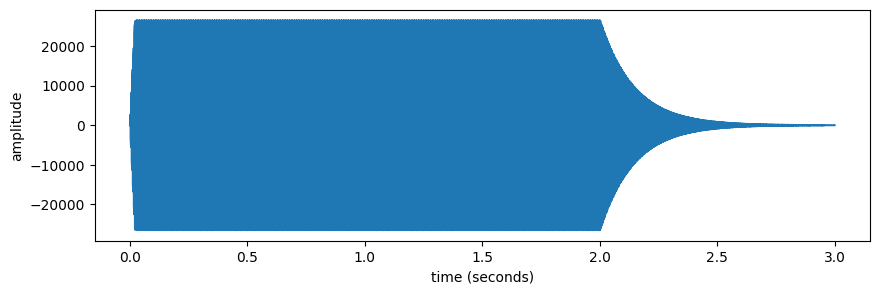

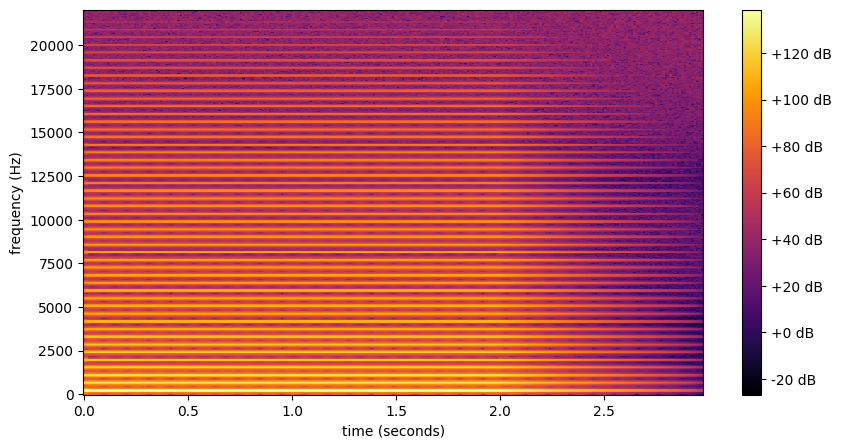

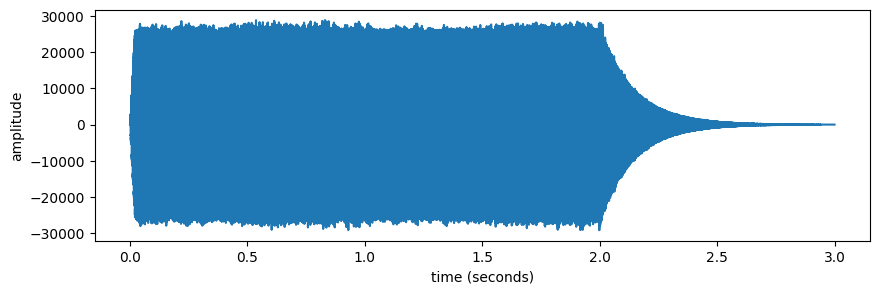

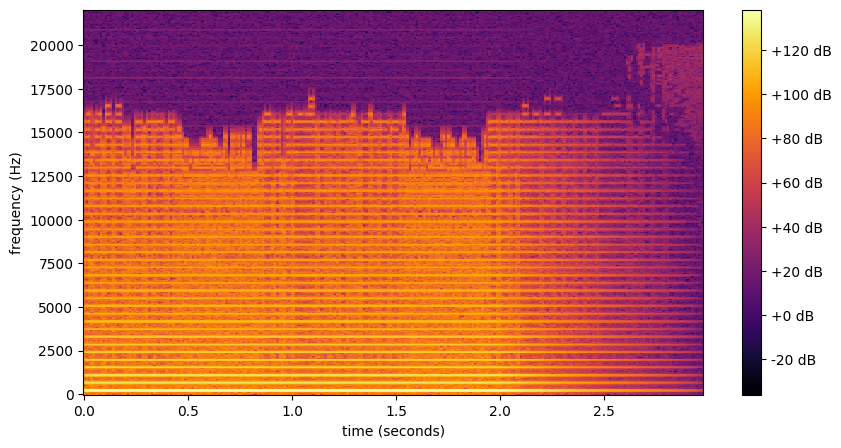

In [71]:
# read the audio file using AudioSegment
audio1 = AudioSegment.from_wav('../sounds/synthetic.wav')
wav_file_size = os.path.getsize('../sounds/synthetic.wav')
print(f'wav file size: {wav_file_size} bytes')

# change the bit_rate used in the compression, try: 256kbits/s, 192kbits/s, 96kbits/s, 32kbits/s.
# find the lowest bitrate for which you do not hear a difference
bit_rate ="75k"

# compress the sound with mp3
audio1.export('../labs/synthetic.mp3', format="mp3", bitrate=bit_rate)

# read the compressed mp3 file
audio2 = AudioSegment.from_mp3('../labs/synthetic.mp3')
mp3_file_size = os.path.getsize('synthetic.mp3')
print(f'mp3 file size: {mp3_file_size} bytes')

# display the original and compressed sound
x = np.array(audio1.get_array_of_samples())
y = np.array(audio2.get_array_of_samples())
display_sound(x,audio1.frame_rate)
display_spectrogram(x, 512, 1024, audio1.frame_rate)
display_sound(y,audio2.frame_rate)
display_spectrogram(y, 512, 1024, audio2.frame_rate)

**Questions: (answer in this cell)**

**1. Apply mp3 compression to the `synthetic.wav`sound. Explain the perceptual effect of different bit rates in the mp3 coding, 256kbits/s, 192kbits/s, 96kbits/s, 32kbits/s. Use the spectrograms of the original and compressed sounds to suport your explanation. What is the lowest bit rate for which you do not hear a significant difference?**
After comparing all the different bit rates, we can extract the following conclusions:

<u>256 kbits/s to 96 kbits/s:</u>

Waveform: The amplitude of the waveform varies slightly as the bit rate decreases, but these changes are minimal and not perceptible when listening.

Spectrogram: As the bit rate decreases, we observe a loss of high-frequency information. At 256 kbits/s, frequencies up to 20,000 Hz are well-preserved. At 96 kbits/s, the cutoff drops to around 15,000 Hz, indicating reduced detail in the higher frequencies.

Perceptual Effect: Up to 96 kbits/s, the sound quality remains almost unchanged. At 96 kbits/s, there is a slight metallic quality, especially noticeable in the final part of the sound, but it is not very pronounced.

<u>32 kbits/s:</u>

Waveform: The amplitude variations become more noticeable. The waveform is less smooth, reflecting more significant alterations due to compression.

Spectrogram: The spectrogram shows severe distortion, with a substantial loss of information above 5,000 Hz. The high frequencies are heavily compressed, resulting in poor overall quality and noticeable artifacts.

Perceptual Effect: The sound quality significantly degrades, becoming metallic and thin. The audio loses richness and clarity, with a pronounced "tinny" effect.

**2. Calculate the compression factor obtained by comparing the sizes of the original and the most compressed but good sounding compressed file. Also compute the compression factor by comparing the bit_rate of original sound with the bit_rate of this compresed sound. Any difference? If so, explain the reason.**
To calculate the file size of an audio file, we use the formula:

File Size = Duration x Sampling Rate x Bit Depth x Number of Channels

For the original audio file, the calculated size is approximately 264,644 bytes. This is derived from the duration of 3 seconds, a sampling rate of 44,100 Hz, a bit depth of 16 bits, and 1 channel, resulting in a size of about 264,600 bytes when converted from bits to bytes.

For the most compressed but still good-sounding audio file, the size is calculated using a duration of 3 seconds, a sampling rate of 22,050 Hz, a bit depth of 10 bits, and 1 channel. This gives us a size of approximately 82,687 bytes.

From these calculations, we find that the compression factor based on file sizes is 3.2:1. This means that the original file is about 3.2 times larger than the compressed file.

Next, we compute the bit rates. The original bit rate is calculated using the formula:

Bit Rate = Sampling Rate x Bit Depth x Number of Channels

For the original audio, this results in a bit rate of 705.6 kbits/s (calculated from a sampling rate of 44,100 Hz, a bit depth of 16 bits, and 1 channel). The bit rate of the compressed file is 75 kbits/s.

This gives us a compression factor based on bit rates of approximately 9.4:1, indicating that the original bit rate is about 9.4 times higher than that of the compressed file.

The difference between these 2 results can be because when using the MP3 encoding method, there may be other techniques implemented to reduce the bit rate further. These methods can include psychoacoustic models that eliminate non-perceivable frequencies, allowing for a smaller file size while maintaining acceptable audio quality.

----